# $ \mbox{Asymptotic methods with SymPy}$

Projectile motion in a linear potential field with images is described by the equation

$$y_{\tau \tau} + \alpha \frac{1}{(1 + \epsilon y)^2} + 1= 0,$$

with $y(0) = \epsilon$ and $y_{\tau}(0)=1$, and where $\epsilon \ll 1$ is expected.

In [1]:
import sympy as sym
from sympy import init_printing
init_printing() 

In [2]:
y, eps, a, b, tau, alpha = sym.symbols('y, epsilon, a, b, tau, alpha')
y0 = sym.Function('y0')(tau)
y1 = sym.Function('y1')(tau)
y2 = sym.Function('y2')(tau)
y3 = sym.Function('y3')(tau)
y4 = sym.Function('y4')(tau)

In [3]:
y = sym.Eq(y0 + eps*y1 + eps**2*y2 + eps**3*y3 + eps**4*y4) # naive expansion

class f(sym.Function):
    
    @classmethod
    def eval(cls, y):
        return y.lhs.diff(tau,tau) + alpha*1/(1 + eps*y.lhs)**2 + 1
        #return y.lhs.diff(tau, tau) + eps/y.lhs**2


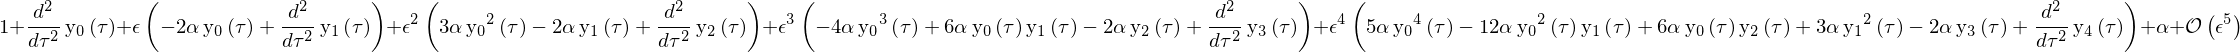

In [4]:
the_series = sym.series(f(y), eps, x0=0, n=5)
by_order = sym.collect(the_series, eps, evaluate=False)
the_series

### $\mathcal{O} \left( 1 \right) \mbox{Solution}$

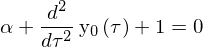

In [5]:
sym.Eq(by_order[1].removeO())

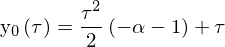

In [6]:
eqn = sym.Eq(by_order[1].removeO())    #1 + y0(tau).diff(tau, tau))
soln0 = sym.dsolve(eqn, y0)
constants = sym.solve([soln0.rhs.subs(tau,0) - 0, \
                      soln0.rhs.diff(tau).subs(tau,0) - 1])
C1, C2 = sym.symbols('C1 C2')
soln0 = soln0.subs(constants)
soln0

### $\mathcal{O} \left( \epsilon \right) \mbox{Solution}$

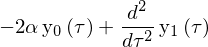

In [7]:
by_order[eps]

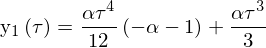

In [8]:
try:
    eqn = sym.Eq(by_order[eps].replace(y0, soln0.rhs))
except NameError:
    eqn = sym.Eq(by_order[eps])
    
soln1 = sym.dsolve(eqn, y1)
constants = sym.solve([soln1.rhs.subs(tau,0) - 0, \
                      soln1.rhs.diff(tau,1).subs(tau,0) - 0])
C1, C2 = sym.symbols('C1 C2')
soln1 = soln1.subs(constants)
soln1


### $\mathcal{O} \left( \epsilon^2 \right) \mbox{Solution}$

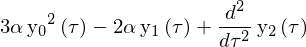

In [9]:
by_order[eps**2]

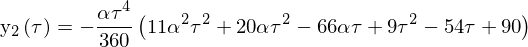

In [10]:
try:
    eqn = sym.Eq(by_order[eps**2].replace(y1, soln1.rhs).replace(y0, soln0.rhs))
except NameError:
    eqn = sym.Eq(by_order[eps**2].replace(y1, soln1.rhs))
    
soln2 = sym.dsolve(eqn, y2)
constants = sym.solve([soln2.rhs.subs(tau,0) - 0, \
                      soln2.rhs.diff(tau,1).subs(tau,0) - 0])
C1, C2 = sym.symbols('C1 C2')
soln2 = soln2.subs(constants)
sym.factor(soln2)

### $\mathcal{O} \left( \epsilon^3 \right) \mbox{Solution}$

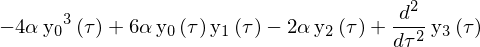

In [11]:
by_order[eps**3]

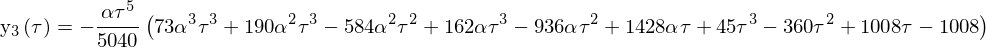

In [12]:
try:
    eqn = sym.Eq(by_order[eps**3].replace(y2, soln2.rhs).replace(y1, soln1.rhs).replace(y0, soln0.rhs))
except NameError:
    eqn = sym.Eq(by_order[eps**3].replace(y2, soln2.rhs))
    
soln3 = sym.dsolve(eqn, y3)
constants = sym.solve([soln3.rhs.subs(tau,0) - 0, \
                      soln3.rhs.diff(tau,1).subs(tau,0) - 0])
C1, C2 = sym.symbols('C1 C2')
soln3 = soln3.subs(constants)
sym.factor(soln3)

### $\mathcal{O} \left( \epsilon^4 \right) \mbox{Solution}$

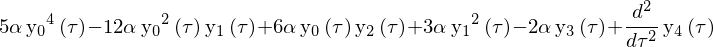

In [13]:
by_order[eps**4]

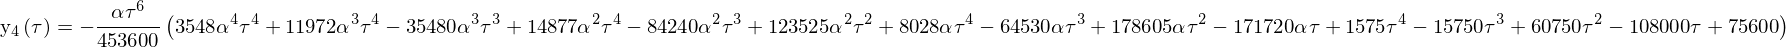

In [14]:
try:
    eqn = sym.Eq(by_order[eps**4].replace(y3, soln3.rhs).replace(
        y2, soln2.rhs).replace(y1, soln1.rhs).replace(y0, soln0.rhs))
except NameError:
    eqn = sym.Eq(by_order[eps**4].replace(y3, soln3.rhs))
    
soln4 = sym.dsolve(eqn, y4)
constants = sym.solve([soln4.rhs.subs(tau,0) - 0, \
                      soln4.rhs.diff(tau,1).subs(tau,0) - 0])
C1, C2 = sym.symbols('C1 C2')
soln4 = soln4.subs(constants)
sym.factor(soln4)

### $\mbox{Composite Solution}$

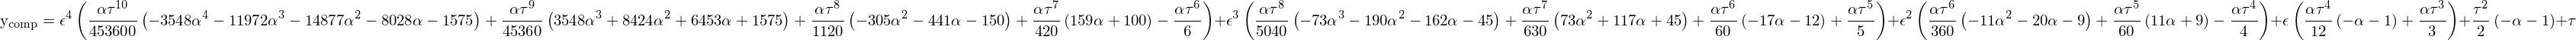

In [15]:
y_comp = sym.symbols('y_{comp}', cls=sym.Function)
try:
    y_comp = sym.Eq(y_comp, soln0.rhs + eps*soln1.rhs + eps**2*soln2.rhs + eps**3*soln3.rhs + eps**4*soln4.rhs) # + eps**2*soln2.rhs)
except NameError:
    y_comp = sym.Eq(y_comp, eps*soln1.rhs + eps**2*soln2.rhs + eps**3*soln3.rhs + eps**4*soln4.rhs) # + eps**2*soln2.rhs)
    
sym.latex(y_comp)
y_comp

### $\mbox{The Trajectory}$

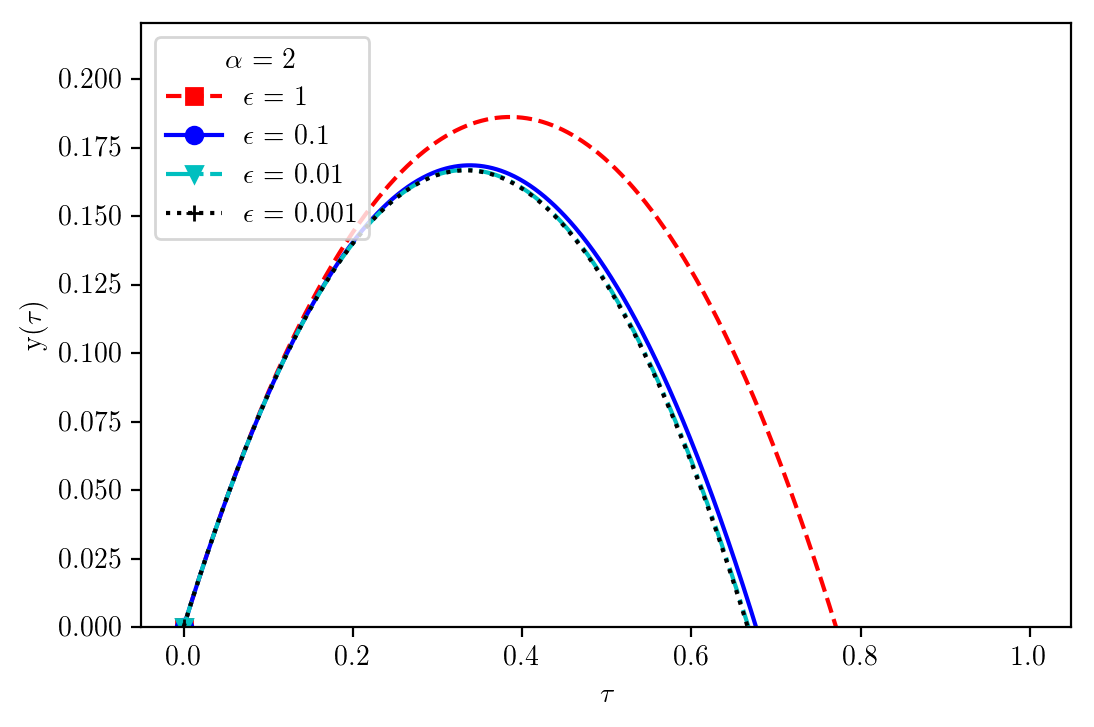

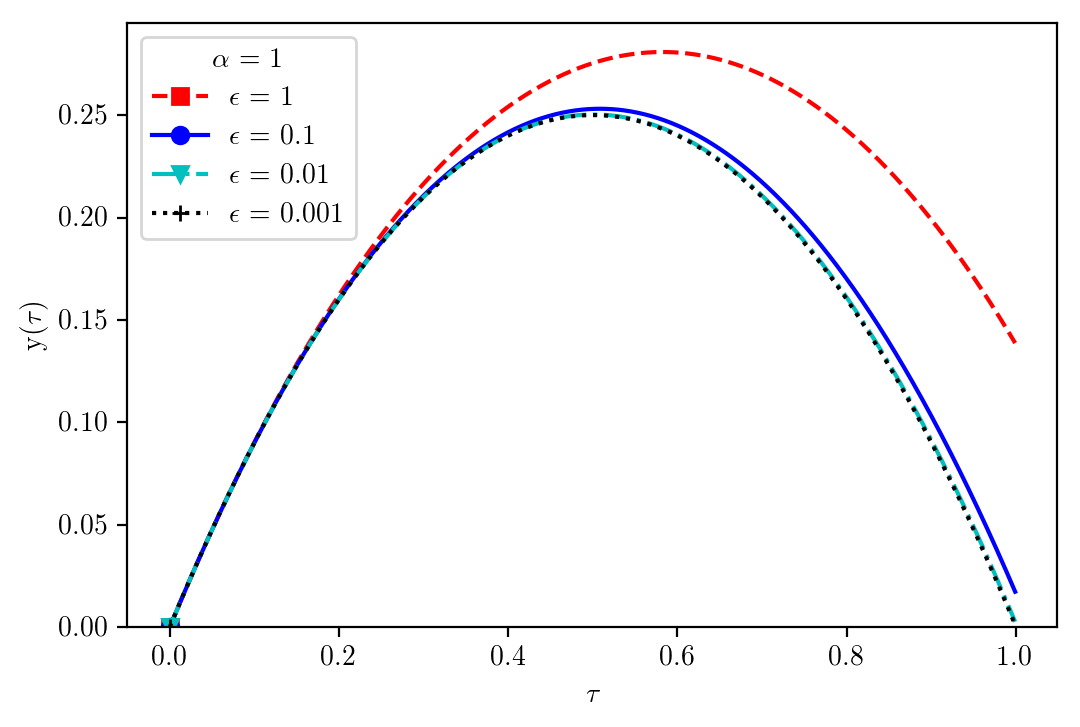

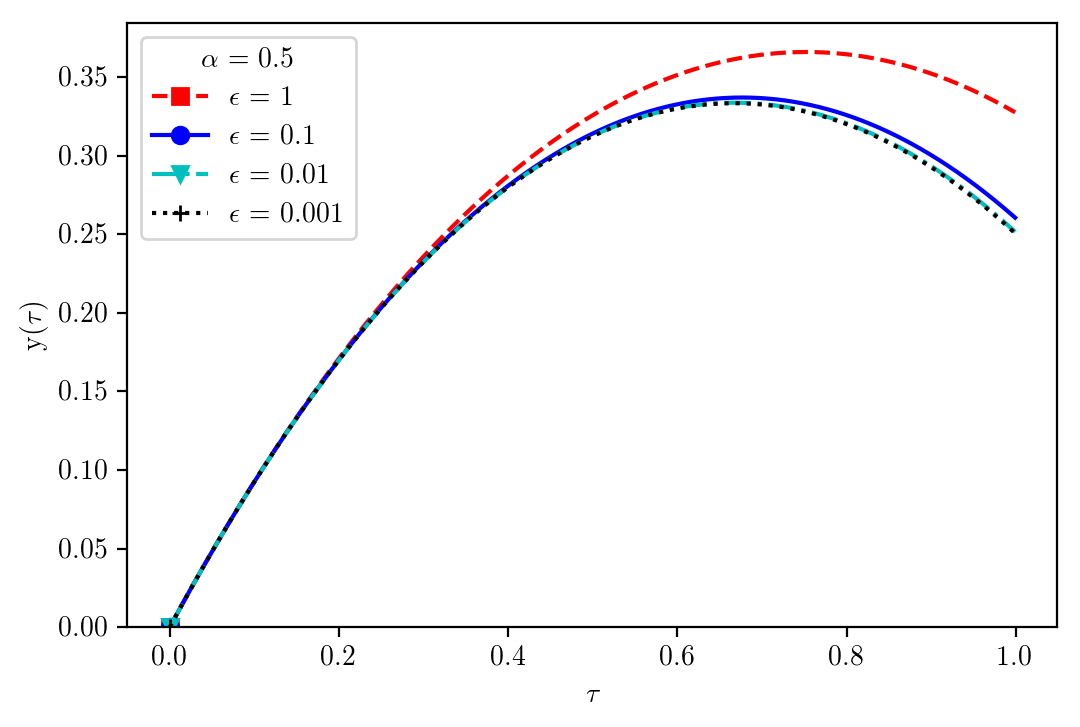

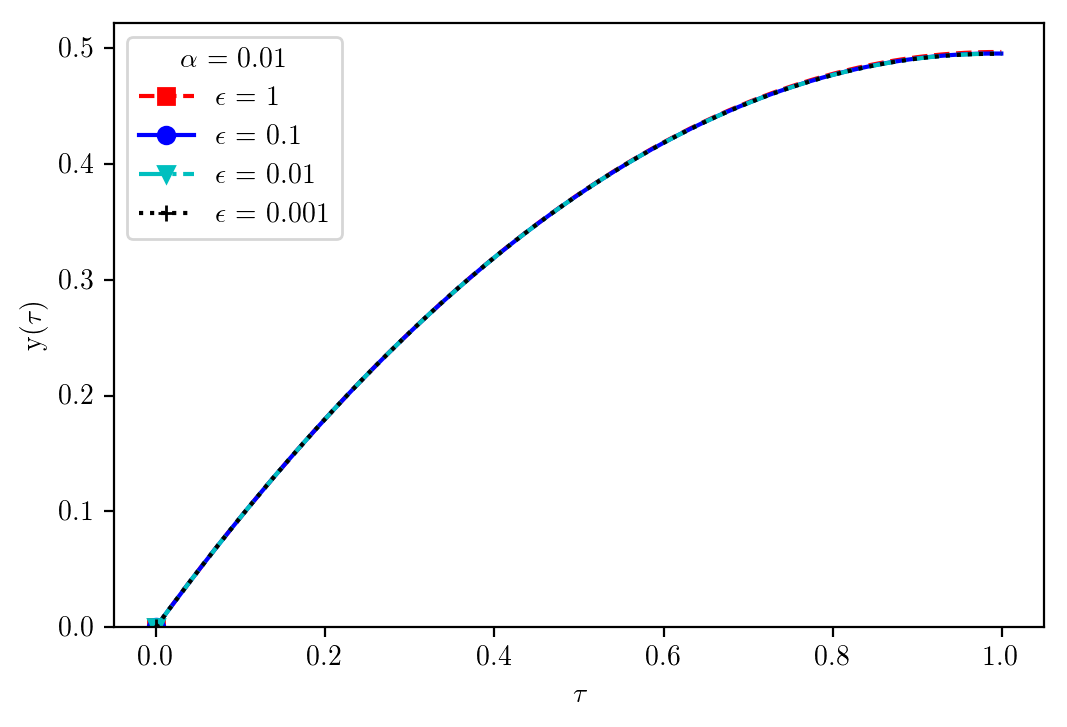

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

eps_val = [.001, .01, .1, 1.][::-1]
linestyle = ['rs--', 'bo-', 'cv-.', 'k+:', 'm']
tt = sp.arange(0,1,0.001)
al = [2., 1., .5, .01]
for aas in al:
    yc = y_comp.rhs.subs(alpha, aas)
    plt.figure(figsize=(6, 4), dpi=100)
    for keys, vals in enumerate(eps_val):
        y_compP = sym.lambdify(tau, yc.subs(eps, vals), 'numpy')
        plt.plot(tt, y_compP(tt), linestyle[keys],label='$\epsilon$ = {}'.format(vals).rstrip('0').rstrip('.'),
                 markevery=len(tt)/10)
    plt.ylim(ymin=0.)
    plt.ylabel(r'y$(\tau)$')
    plt.xlabel(r'$\tau$')
    plt.legend(title = r'$\alpha$ = {:1.2f}'.format(aas).rstrip('0').rstrip('.'), loc=2)
    plt.show()